In [1]:
import warnings

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('drug_consumption.csv')
copy_df = df.copy()      
# df.info()

In [71]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [72]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [47]:
df.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

/home/harini/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



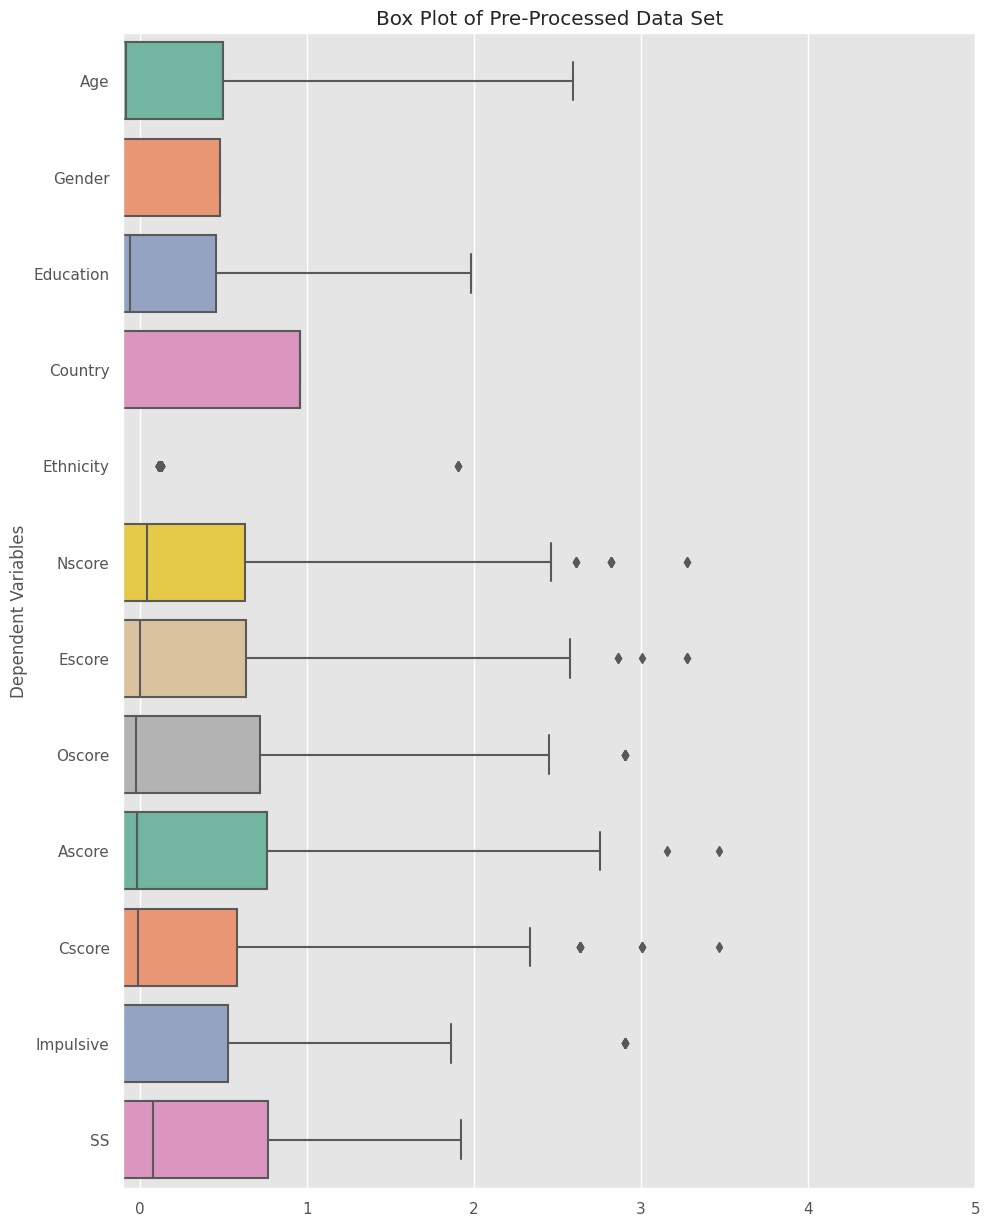

In [48]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim=(-.100, 5))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = df[feature_col_names], 
  orient = 'h', 
  palette = 'Set2')

In [4]:
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

In [50]:
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [6]:
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])
    
# copy_df["Alcohol"].head(30)

In [7]:
for i in range(len(columns)):
    copy_df.loc[((copy_df[columns[i]]==0) | (copy_df[columns[i]]==1)),cp[i]] = 'Non-user'
    copy_df.loc[((copy_df[columns[i]]==2) | (copy_df[columns[i]]==3) | (copy_df[columns[i]]==4) | (copy_df[columns[i]]==5) | (copy_df[columns[i]]==6)),cp[i]] = 'User'

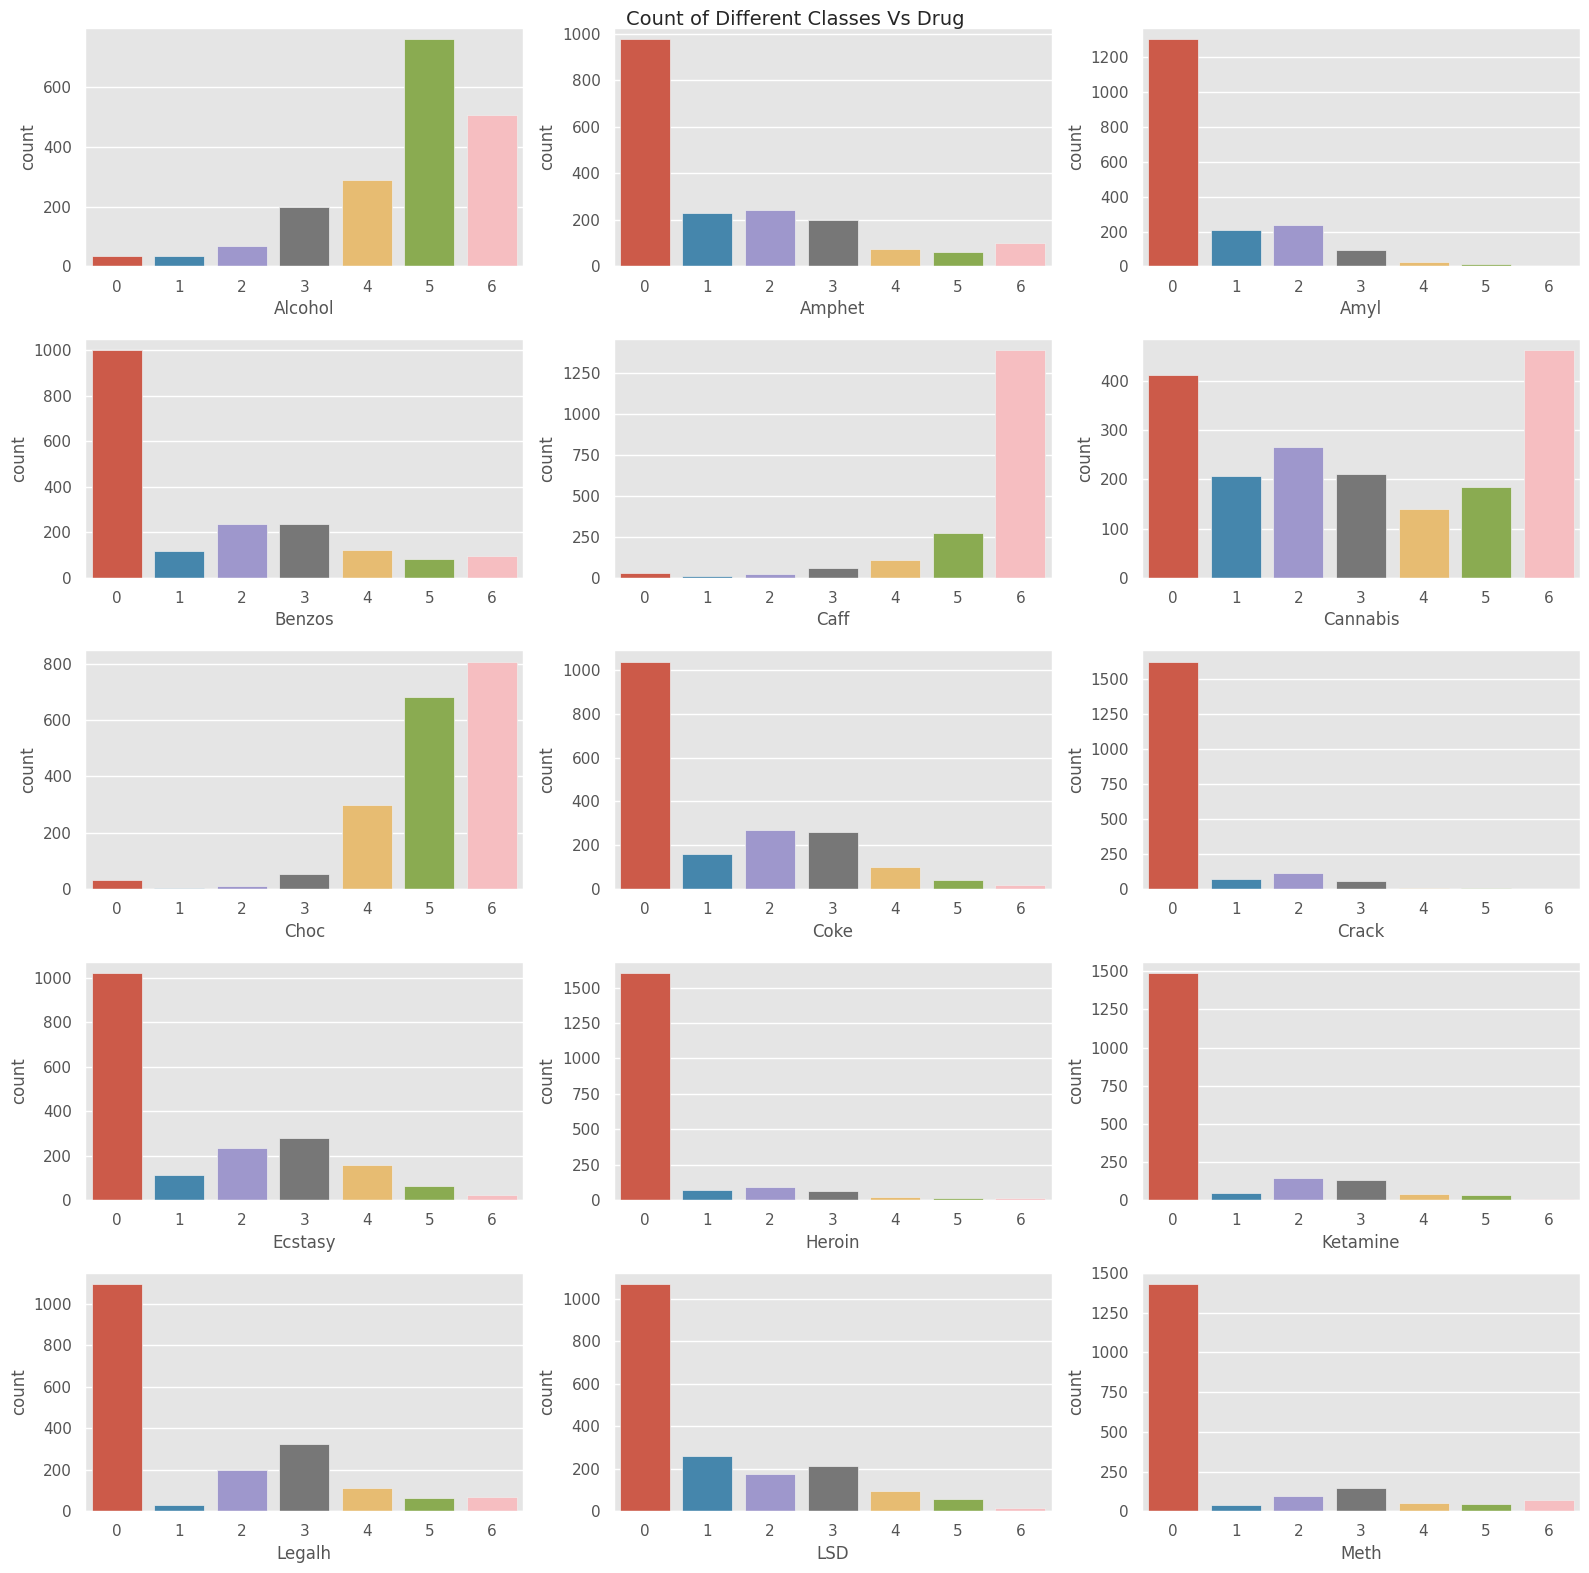

In [53]:
# "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day"

fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=columns[k], data=copy_df,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

In [54]:
count_of_users = []
count_of_non_users = []

In [55]:
for i in range(len(columns)):
    s = copy_df.groupby([cp[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

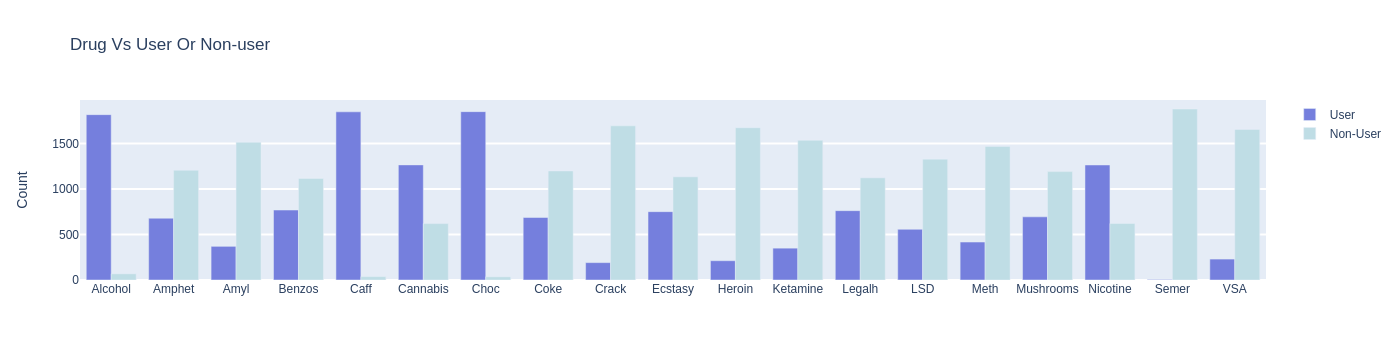

In [56]:
trace1 = go.Bar(
    x=columns,
    y=count_of_users,
    name='User',
    marker = dict(color="rgb(117, 127, 221)")
)
trace2 = go.Bar(
    x=columns,
    y=count_of_non_users,
    name='Non-User',
    marker = dict(color="rgb(191, 221, 229)")
)


data = [trace1, trace2]
layout = go.Layout(
    title= 'Drug Vs User Or Non-user',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [8]:
for column in copy_df.columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])

In [58]:
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [59]:
copy_df['Count'] = pd.Series()
copy_df['Count'] = copy_df['Count'].fillna(value = 0.0)
for i in cp:
    copy_df['Count']+=copy_df[i]

/tmp/ipykernel_14601/3016236956.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [60]:
pk = copy_df['Count'].value_counts()

In [61]:
df['Country'].value_counts()
con = ['UK','USA','Canada','Australia','Ireland','New Zealand']

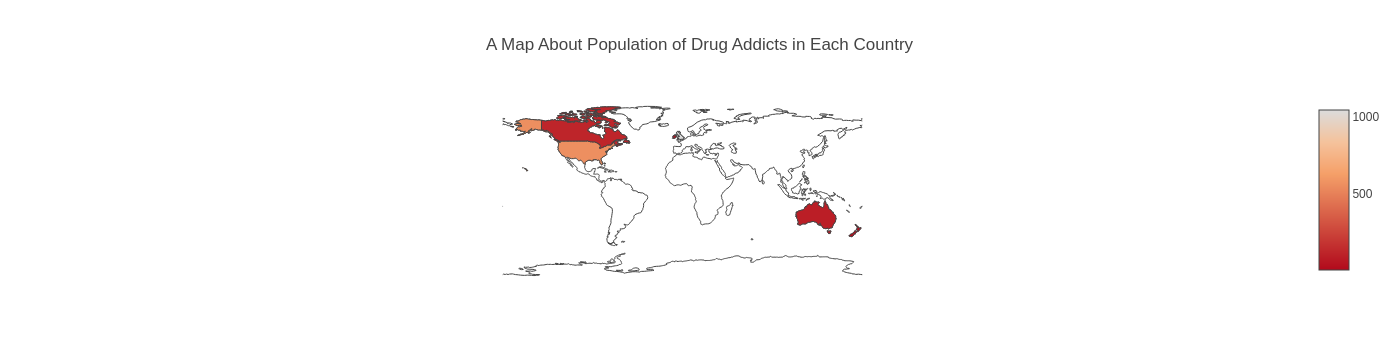

In [62]:
data = [dict(
        type='choropleth',
        locations = con,
        locationmode='country names',
        z=(df['Country'].value_counts().values),
        text=con,
        colorscale='portland',
        reversescale=True,
)]
layout = dict(
    title = 'A Map About Population of Drug Addicts in Each Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-map')

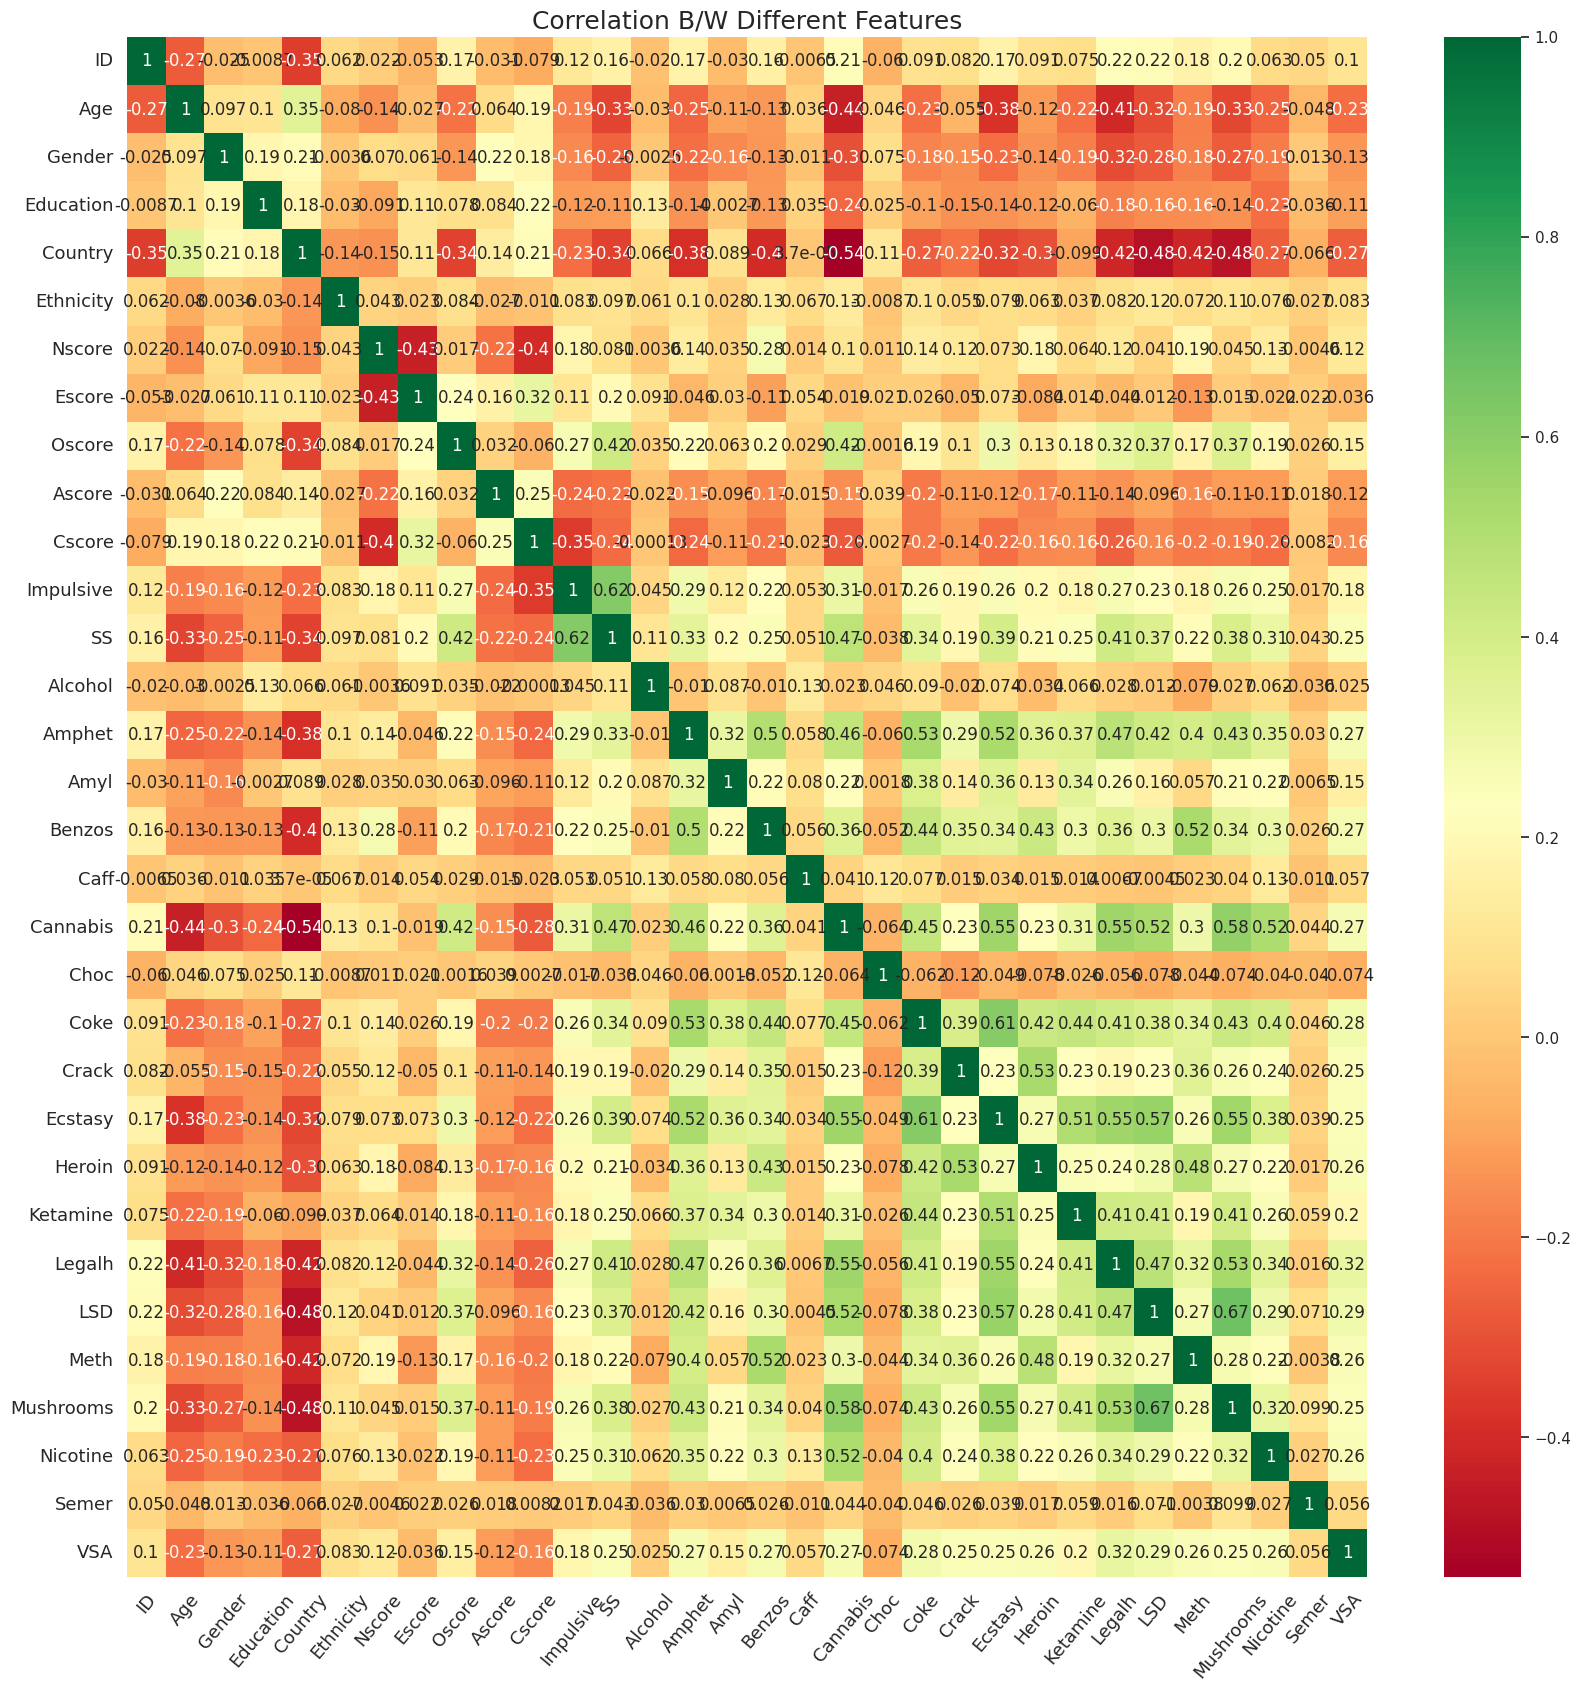

In [63]:
corrmat = df.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df.columns, xticklabels = df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

In [64]:
yp = []
for i in df['Benzos']:
    if(i==0):
        yp.append([1,0,0,0,0,0,0])
    elif(i==1):
        yp.append([0,1,0,0,0,0,0])
    elif(i==2):
        yp.append([0,0,1,0,0,0,0])
    elif(i==3):
        yp.append([0,0,0,1,0,0,0])
    elif(i==4):
        yp.append([0,0,0,0,1,0,0])
    elif(i==5):
        yp.append([0,0,0,0,0,1,0])
    elif(i==6):
        yp.append([0,0,0,0,0,0,1])
yp = np.array(yp)

In [29]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['Benzos']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, yp, test_size=0.30, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
# SVM for Multiclass Classification

In [31]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [44]:
# df.head()
# df.to_csv("encoded.csv",index="false")
pf = pd.read_csv("encoded.csv")
pd.Series(pf['SS'].unique()).sort_values()

9      0
3      1
0      2
6      3
5      4
1      5
4      6
2      7
8      8
7      9
10    10
dtype: int64

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=2,random_state=0)
svm.fit(X_train1, y_train1.ravel())

SVC(C=2, random_state=0)

In [34]:
pred = svm.predict(X_test)
accu = metrics.accuracy_score(y_test1,pred)
accu

0.5424028268551236

In [ ]:
2,1,4,0,2,41,9,3,30,26,3,1

In [14]:
svm.predict([[2,1,4,0,2,41,9,3,30,26,3,1],[3,1,4,6,2,16,26,10,17,20,2,6]])

array([1, 0])

In [264]:
# SVM For Binary Classfication

In [265]:
copy_df[predicted_class_names]

,Benzos
0,2
1,0
2,0
3,3
4,0
...,...
1880,0
1881,0
1882,5
1883,0


In [10]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['User_Benzos']

X = copy_df[feature_col_names].values
y = copy_df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
copy_df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer,User_VSA
0,0,2,1,5,6,5,27,19,16,17,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,8,6,2,17,35,29,28,...,1,0,1,0,1,1,0,1,0,0
2,2,2,0,5,6,2,19,28,14,12,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,7,6,2,22,17,20,27,...,0,0,1,0,0,0,0,1,0,0
4,4,2,1,8,6,2,31,11,17,21,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1880,0,1,4,0,2,13,34,31,28,...,0,0,0,1,1,0,0,0,0,1
1881,1881,0,0,4,0,2,21,34,24,28,...,1,0,0,1,1,1,1,1,0,0
1882,1882,1,1,6,0,2,35,13,11,11,...,1,0,1,0,1,0,1,1,0,0
1883,1883,0,1,4,0,2,33,9,22,12,...,1,0,0,1,1,0,1,1,0,0


In [38]:
from sklearn.metrics import auc

def report_performance(model):

    model_test = model.predict(X_test)
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=1,random_state=0)
svm.fit(X_train, y_train.ravel())
# report_performance(svm) 

SVC(C=1, kernel='linear', random_state=0)

In [40]:
pred = svm.predict(X_test)
accu = metrics.accuracy_score(y_test1,pred)
accu

0.42579505300353354

In [295]:
# Decision tree



Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       336
           1       0.61      0.65      0.63       230

    accuracy                           0.69       566
   macro avg       0.68      0.68      0.68       566
weighted avg       0.69      0.69      0.69       566



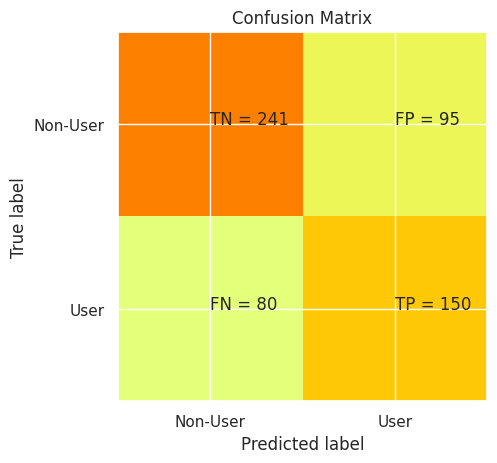


Accuracy Of the Model:  0.4134275618374558 



In [296]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
pred = clf_dtc.predict(X_test)
accu = metrics.accuracy_score(y_test1,pred)
print("\nAccuracy Of the Model: ",accu,"\n")

In [297]:
# pred = svm.predict([[0,0,0,0,0,0,0,0,0,0,1,0]])
# pred

In [298]:
# K-Neighbour Classifier:

In [299]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

/home/harini/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [304]:
pred = clf.predict(X_test)
accu = metrics.accuracy_score(y_test1,pred)



Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       336
           1       0.59      0.50      0.54       230

    accuracy                           0.65       566
   macro avg       0.64      0.63      0.63       566
weighted avg       0.65      0.65      0.65       566



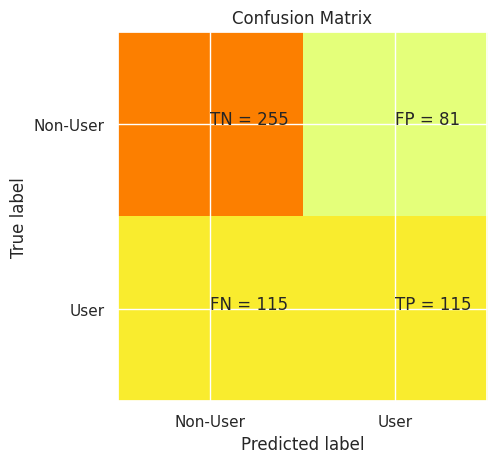


Acuuracy Of the Model:  0.4169611307420495 



In [305]:
report_performance(clf)
print("\nAcuuracy Of the Model: ",accu,"\n")

In [306]:
# K-Neighbour Classifier for Multiclass:

In [307]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['Benzos']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)

In [308]:
clf = KNeighborsClassifier()
clf.fit(X_train1,y_train1)

/home/harini/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [311]:
pred = clf.predict(X_test1)
accu = metrics.accuracy_score(y_test1,pred)

In [312]:
accu

0.5035335689045937